<a href="https://colab.research.google.com/github/protontypes/osta/blob/main/packages_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pyalex semanticscholar habanero itables

In [2]:
import requests
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import pyalex
pyalex.config.email = "ly0@protonmail.com"
from habanero import counts

from semanticscholar import SemanticScholar
sch = SemanticScholar()

URL = "https://ost.ecosyste.ms/api/v1/projects/packages"
FILE_TO_SAVE_AS = "ecosystems_downloads.json" # the name you want to save file as

import os.path
#os.path.isfile(fname)

resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file
    f.write(resp.content) # writing content to file

In [3]:
import pandas as pd

# Define the S3 path to the Parquet file
s3_path = 's3://anaconda-package-data/conda/monthly/2024/2024-12.parquet'

# Load the Parquet file into a DataFrame
df_conda = pd.read_parquet(s3_path, engine='pyarrow')
package_name = 'pypsa'
package_data = df_conda[df_conda['pkg_name'] == package_name]
total_downloads = package_data['counts'].sum()
print(f'Total downloads for {package_name}: {total_downloads}')

Total downloads for pypsa: 4126


In [4]:
print(df_conda[df_conda['pkg_name'] == package_name]['counts'].sum())

4126


In [5]:
df = pd.read_json(resp.content.decode())

/tmp/ipykernel_69556/2574843592.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(resp.content.decode())


In [6]:
df.head(30)

,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,events,keywords,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,monthly_downloads,readme,funding_links,readme_doi_urls,works,citation_counts,total_citations,keywords_from_contributors,project_url,html_url
0,9458,xarray,An open source project and Python package that...,https://github.com/pydata/xarray,2025-01-14 12:45:21.565000+00:00,"{'id': 10920764, 'uuid': '13221727', 'full_nam...","{'login': 'pydata', 'name': 'Python for Data',...","[{'id': 5294353, 'name': 'xarray', 'ecosystem'...","{'full_name': 'pydata/xarray', 'default_branch...","{'full_name': 'pydata/xarray', 'html_url': 'ht...","{'total': {'CreateEvent': 12, 'ReleaseEvent': ...","[dask, netcdf, numpy, pandas, python, xarray]","[{'ecosystem': 'actions', 'filepath': '.github...",31.748137,2023-09-11 14:36:19.560000+00:00,2025-01-14 12:45:21.603000+00:00,https://github.com/pydata.png,Python,Climate Change,Climate Data Standards,4969958,# xarray: N-D labeled arrays and datasets\n\n[...,"[https://github.com/sponsors/numfocus, https:/...",[https://doi.org/10.5281/zenodo.11183201],{},{},0,"[pydata, closember, flexible, alignment, clima...",https://ost.ecosyste.ms/api/v1/projects/9458,https://ost.ecosyste.ms/projects/9458
1,20618,netcdf-python,The Unidata network Common Data Form (netCDF) ...,https://github.com/Unidata/netcdf4-python,2025-01-15 12:42:13.677000+00:00,"{'id': 13200625, 'uuid': '15884459', 'full_nam...","{'login': 'Unidata', 'name': 'NSF Unidata', 'u...","[{'id': 8535437, 'name': 'gravitools', 'ecosys...","{'full_name': 'Unidata/netcdf4-python', 'defau...","{'full_name': 'Unidata/netcdf4-python', 'html_...","{'total': {'IssuesEvent': 21, 'WatchEvent': 8,...","[netcdf, netcdf4, python]","[{'ecosystem': 'actions', 'filepath': '.github...",25.572996,2023-09-11 14:52:14.006000+00:00,2025-01-15 12:42:13.716000+00:00,https://github.com/Unidata.png,Cython,Climate Change,Climate Data Standards,1460811,To update web docs at http://github.unidata.io...,[],[],{},{},0,"[closember, qt, cf-conventions, netcdftime, gt...",https://ost.ecosyste.ms/api/v1/projects/20618,https://ost.ecosyste.ms/projects/20618
2,903,h5netcdf,A Python interface for the netCDF4 file format...,https://github.com/h5netcdf/h5netcdf,2025-01-15 12:05:44.675000+00:00,"{'id': 30013337, 'uuid': '33561533', 'full_nam...","{'login': 'h5netcdf', 'name': 'h5netcdf', 'uui...","[{'id': 75447, 'name': 'py-h5netcdf', 'ecosyst...","{'full_name': 'h5netcdf/h5netcdf', 'default_br...","{'full_name': 'h5netcdf/h5netcdf', 'html_url':...","{'total': {'CreateEvent': 1, 'ReleaseEvent': 1...","[h5py, hdf5, netcdf, python]","[{'ecosystem': 'actions', 'filepath': '.github...",22.195445,2023-09-11 11:54:36.292000+00:00,2025-01-15 12:05:44.757000+00:00,https://github.com/h5netcdf.png,Python,Climate Change,Climate Data Standards,818204,h5netcdf\n========\n\n.. image:: https://githu...,[],[],{},{},0,"[pydata, measur, closember, transforms, observ...",https://ost.ecosyste.ms/api/v1/projects/903,https://ost.ecosyste.ms/projects/903
3,19753,pvlib-python,A set of documented functions for simulating t...,https://github.com/pvlib/pvlib-python,2025-01-14 12:42:30.266000+00:00,"{'id': 27418229, 'uuid': '30895522', 'full_nam...","{'login': 'pvlib', 'name': 'pvlib', 'uuid': '1...","[{'id': 5290113, 'name': 'pvlib-python', 'ecos...","{'full_name': 'pvlib/pvlib-python', 'default_b...","{'full_name': 'pvlib/pvlib-python', 'html_url'...","{'total': {'CreateEvent': 1, 'ReleaseEvent': 1...","[photovoltaic, python, renewable-energy, renew...","[{'ecosystem': 'actions', 'filepath': '.github...",25.388211,2023-09-11 14:52:06.879000+00:00,2025-01-14 12:42:30.297000+00:00,https://github.com/pvlib.png,Python,Renewable Energy,Photovoltaics and Solar Energy,279161,"<img src=""docs/sphinx/source/_images/pvlib_log...",[],"[https://doi.org/10.5281/zenodo.593284, https:...",{'https://doi.org/10.5281/zenodo.593284': None...,{'https://doi.o

In [7]:
df.iloc[2]["packages"][2] # GO packages do not provide montly download numbers. That's why we had to kick out kube-green

{'id': 5287207,
 'name': 'h5netcdf',
 'ecosystem': 'conda',
 'description': None,
 'homepage': 'https://github.com/h5netcdf/h5netcdf',
 'licenses': 'BSD-3-Clause',
 'normalized_licenses': ['BSD-3-Clause'],
 'repository_url': 'https://github.com/h5netcdf/h5netcdf',
 'keywords_array': [],
 'namespace': None,
 'versions_count': 30,
 'first_release_published_at': '2022-10-03T15:44:30.409Z',
 'latest_release_published_at': '2022-08-02T14:42:49.000Z',
 'latest_release_number': '1.0.2',
 'last_synced_at': '2024-12-29T22:04:30.148Z',
 'created_at': '2022-10-03T15:44:30.395Z',
 'updated_at': '2024-12-29T22:04:30.148Z',
 'registry_url': 'https://anaconda.org/conda-forge/h5netcdf',
 'install_command': 'conda install -c conda-forge h5netcdf',
 'documentation_url': None,
 'metadata': {},
 'repo_metadata': {'uuid': '33561533',
  'full_name': 'h5netcdf/h5netcdf',
  'owner': 'h5netcdf',
  'description': 'Pythonic interface to netCDF4 via h5py',
  'archived': False,
  'fork': False,
  'pushed_at': '202

In [8]:
names = []
download_counts = []
url = []
description = []
category = []
sub_category = []
language = []
total_dependent_repos_count = []
doi = []
citations = []

for index, row in df.iterrows():
    names.append(row['name'])
    package_downloads = 0
    dependent_repos_count = 0
    for package_manager in range(len(row['packages'])):
        if row['packages'][package_manager]['downloads']:
            if row['packages'][package_manager]['downloads_period'] == "last-month":
                package_downloads += row['packages'][package_manager]['downloads']
        if row['packages'][package_manager]['dependent_repos_count']:
                dependent_repos_count += row['packages'][package_manager]['dependent_repos_count']
            
    conda_downloads = df_conda[df_conda['pkg_name'] == row['name']]['counts'].sum()
    package_downloads += conda_downloads
    
    download_counts.append(package_downloads)
    total_dependent_repos_count.append(dependent_repos_count)
    
    url.append(row['url'])
    description.append(row['description'])
    category.append(row['category'])
    sub_category.append(row['sub_category'])
    language.append(row['language'])
    citations.append(row['total_citations'])


In [9]:
#df.iloc[2] # GO packages do not provide montly download numbers. That's why we had to kick out kube-green

In [10]:
df_extract = pd.DataFrame()
df_extract['project_names'] = names
df_extract['download_counts'] = download_counts
df_extract['git_url'] = url
df_extract['description'] = description
df_extract['category'] = category
df_extract['sub_category'] = sub_category
df_extract['language'] = language
df_extract['total_dependent_repos_count'] = total_dependent_repos_count
df_extract['citations'] = citations
df_extract.head(200)

df_extract = df_extract[(df_extract['category'] == 'Renewable Energy') | (df_extract['category'] == 'Energy Systems') | (df_extract['category'] == 'Energy Storage')]


In [11]:
#df_extract.loc[df['language'] == 'Julia']

In [12]:
import textwrap

def text_to_link(project_name, git_url):
    return '<a href="' + git_url + '" target="_blank" style = "color: black">' + str(project_name) + "</a>"

def text_to_bolt(topic):
    return "<b>" + topic + "</b>"

def line_break_text(text):
    wrapped_text = '<br>'.join(textwrap.wrap(text, 64))
    return wrapped_text

df_extract["description"] = df_extract.apply(
    lambda x: line_break_text(x.description), axis=1
)


df_extract["project_names"] = df_extract.apply(
    lambda x: text_to_link(x.project_names, x.git_url), axis=1
)
df_extract

,project_names,download_counts,git_url,description,category,sub_category,language,total_dependent_repos_count,citations
3,"<a href=""https://github.com/pvlib/pvlib-python...",279976,https://github.com/pvlib/pvlib-python,A set of documented functions for simulating t...,Renewable Energy,Photovoltaics and Solar Energy,Python,150,475
4,"<a href=""https://github.com/EnergieID/entsoe-p...",257856,https://github.com/EnergieID/entsoe-py,A Python client for the ENTSO-E API (European ...,Energy Systems,Energy Data Accessibility and Integration,Python,28,0
18,"<a href=""https://github.com/sunpower/pvfactors...",50766,https://github.com/sunpower/pvfactors,Open source view-factor model for diffuse shad...,Renewable Energy,Photovoltaics and Solar Energy,Python,3,0
20,"<a href=""https://github.com/NREL/SAM"" target=""...",47154,https://github.com/NREL/SAM,A simulation program for electricity generatio...,Energy Systems,Energy System Modeling Frameworks,C++,15,0
25,"<a href=""https://github.com/pybamm-team/pybamm...",36191,https://github.com/pybamm-team/pybamm,Fast and flexible physics-based battery models...,Energy Storage,Battery,Python,13,102
27,"<a href=""https://github.com/energywebfoundatio...",32242,https://github.com/energywebfoundation/origin,A set of toolkits that together provide a syst...,Energy Systems,Energy Markets,TypeScript,103,0
31,"<a href=""https://github.com/e2niee/pandapower""...",23413,https://github.com/e2niee/pandapower,An easy to use open source tool for power syst...,Energy Systems,Energy System Modeling Frameworks,Python,75,0
32,"<a href=""https://github.com/openeemeter/eemete...",22709,https://github.com/openeemeter/eemeter,An open source Python package for implementing...,Energy Systems,Building Energy Monitoring,Python,5,0
36,"<a href=""https://github.com/CalebBell/thermo"" ...",20490,https://github.com/CalebBell/thermo,"Thermodynamics, phase equilibrium, transport p...",Renewable Energy,Geothermal Energy,Python,19,0
39,"<a href=""https://github.com/grid-parity-exchan...",17460,https://github.com/grid-parity-exchange/Egret,A Python-based package for electrical grid opt...,Energy Systems,Grid Analysis and Planning,Python,4,0


In [13]:
df_extract.reset_index(drop=True, inplace=True)

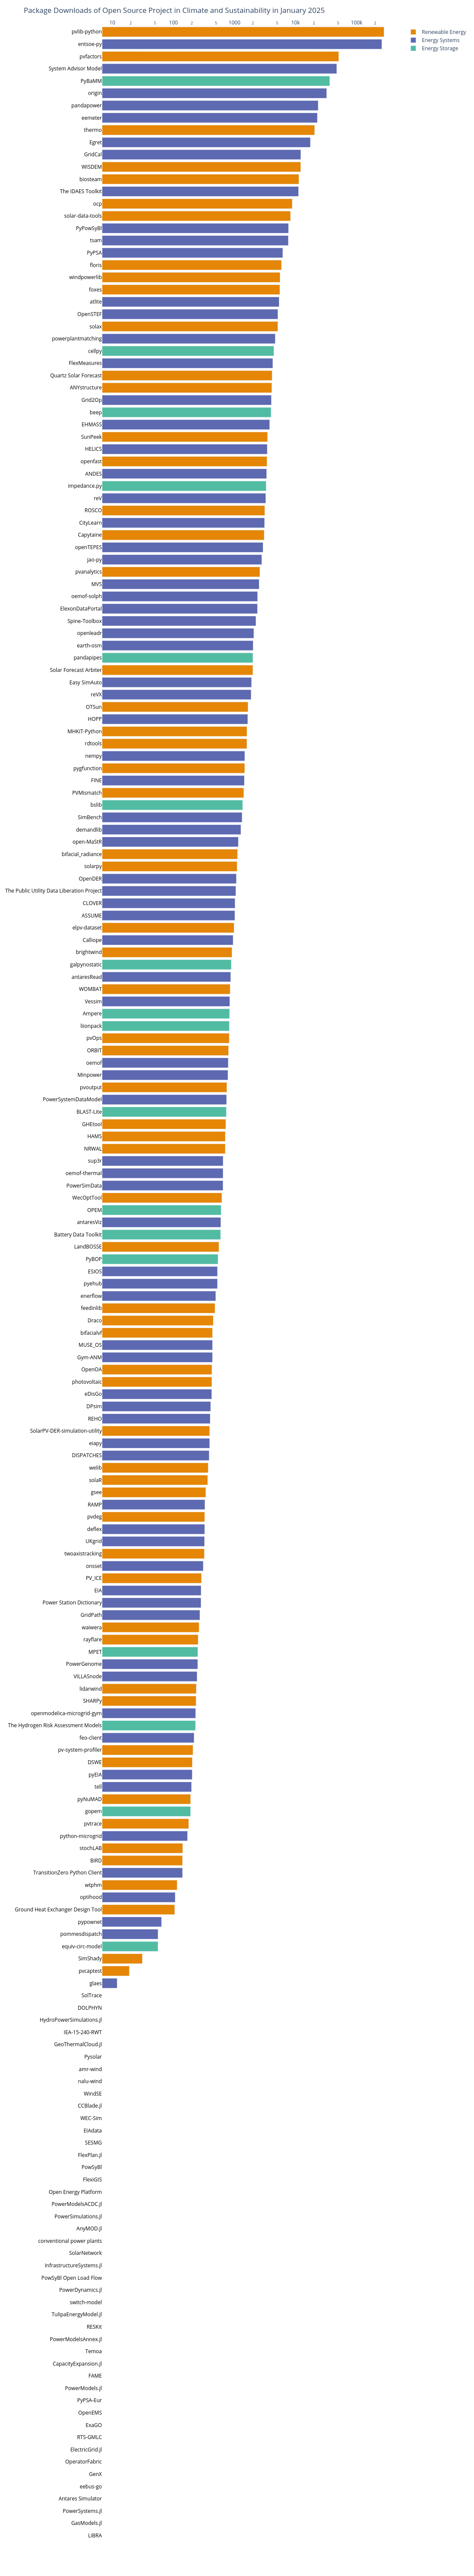

In [18]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Format the date to display the full month and year
month_year = current_date.strftime("%B %Y")


#df_extract = df_extract[df_extract["category"] == "Renewable Energy"]

number_of_projects_to_show = 300
top_downloaders = df_extract.nlargest(number_of_projects_to_show, "download_counts")
top_downloaders.index.name = "ranking"
color_discrete_sequence = px.colors.qualitative.Vivid
fig = px.bar(
    top_downloaders,
    x=top_downloaders["download_counts"],
    y=top_downloaders["project_names"],
    custom_data=["project_names", "download_counts", "git_url", "description","category","sub_category","language",top_downloaders.index+1],
    orientation="h",
    color = 'category',
    color_discrete_sequence=color_discrete_sequence,
)

fig.update_layout(
    height=number_of_projects_to_show*20,  # Added parameter
    #width=700,
    xaxis_title="",
    yaxis_title=None,
    title="Package Downloads of Open Source Project in Climate and Sustainability in "+month_year,
    dragmode=False,
)

fig.update_layout(hovermode="y unified",hoverdistance=1000)

fig.update_traces(
    hovertemplate="<extra></extra>"+"<br>".join(
        [
            "Ranking: <b>%{customdata[7]}</b>",
            "Description: <b>%{customdata[3]}</b>",
            "Category: <b>%{customdata[4]}</b>",
            "Sub Category: <b>%{customdata[5]}</b>",
            "Language: <b>%{customdata[6]}</b>",
            "Downloads per month: <b>%{customdata[1]}</b>",
        ]
    )

)

#fig.update(layout_showlegend=False)

fig.update_layout(modebar=dict(bgcolor="rgba(0,0,0,0)"))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
  },
  'responsive':'true'
}
fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(modebar_color="#009485", modebar_activecolor="#2563eb")
fig["layout"]["yaxis"]["autorange"] = "reversed"

fig.update_xaxes(showspikes=False)  # <-- add this line
fig.update_yaxes(showspikes=False)  # <-- add this line
#fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
#                  plot_bgcolor = "rgba(0,0,0,0)")

#fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_type = "log",yaxis_categoryorder = 'total descending',legend_title=None, xaxis={'side': 'top'}, )
#fig.show(config=config)

#pio.write_json(fig,"download_plot.json")
#pio.write_html(fig,"download_plot.html")

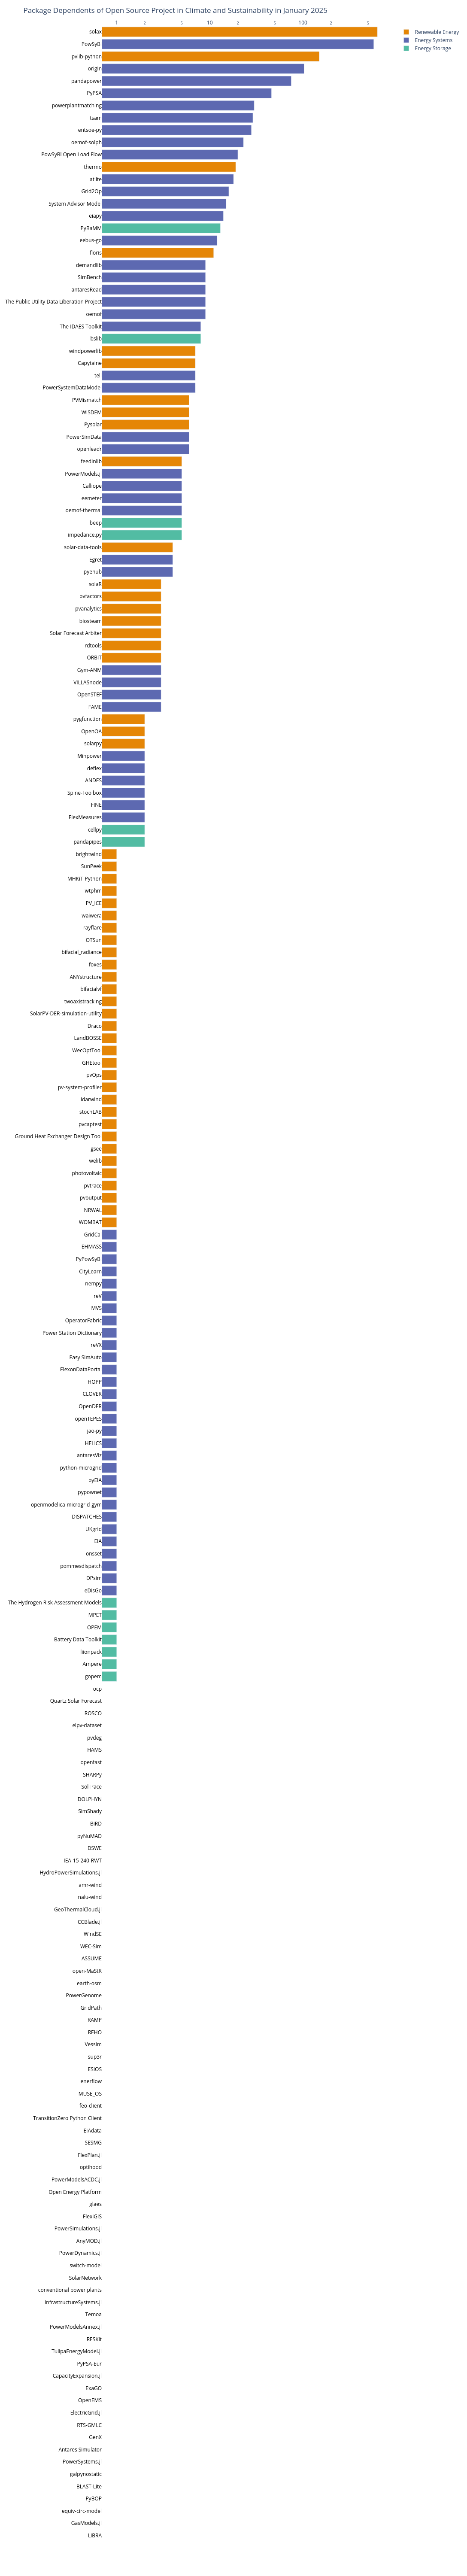

In [19]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Format the date to display the full month and year
month_year = current_date.strftime("%B %Y")


#df_extract = df_extract[df_extract["category"] == "Renewable Energy"]

number_of_projects_to_show = 300
top_dependent_repos_counts = df_extract.nlargest(number_of_projects_to_show, "total_dependent_repos_count")
top_dependent_repos_counts.index.name = "ranking"
color_discrete_sequence = px.colors.qualitative.Vivid
fig = px.bar(
    top_dependent_repos_counts,
    x=top_dependent_repos_counts["total_dependent_repos_count"],
    y=top_dependent_repos_counts["project_names"],
    custom_data=["project_names", "total_dependent_repos_count", "git_url", "description","category","sub_category","language",top_dependent_repos_counts.index+1],
    orientation="h",
    color = 'category',
    color_discrete_sequence=color_discrete_sequence,
)

fig.update_layout(
    height=number_of_projects_to_show*20,  # Added parameter
    #width=700,
    xaxis_title="",
    yaxis_title=None,
    title="Package Dependents of Open Source Project in Climate and Sustainability in "+month_year,
    dragmode=False,
)

fig.update_layout(hovermode="y unified",hoverdistance=1000)

fig.update_traces(
    hovertemplate="<extra></extra>"+"<br>".join(
        [
            "Ranking: <b>%{customdata[8]}</b>",
            "Description: <b>%{customdata[4]}</b>",
            "Sub Category: <b>%{customdata[6]}</b>",
            "Sub Category: <b>%{customdata[6]}</b>",
            "Language: <b>%{customdata[7]}</b>",
            "Dependents: <b>%{customdata[1]}</b>",
            "Category: <b>%{customdata[5]}</b>",

        ]
    )

)

#fig.update(layout_showlegend=False)

fig.update_layout(modebar=dict(bgcolor="rgba(0,0,0,0)"))

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
  },
  'responsive':'true'
}
fig.update_layout(
    plot_bgcolor='white'
)

fig.update_layout(modebar_color="#009485", modebar_activecolor="#2563eb")
fig["layout"]["yaxis"]["autorange"] = "reversed"

fig.update_xaxes(showspikes=False)  # <-- add this line
fig.update_yaxes(showspikes=False)  # <-- add this line
#fig.update_layout(paper_bgcolor = "rgba(0,0,0,0)",
#                  plot_bgcolor = "rgba(0,0,0,0)")

#fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
fig.update_layout(xaxis_type = "log",yaxis_categoryorder = 'total descending',legend_title=None, xaxis={'side': 'top'}, )
#fig.show(config=config)

#pio.write_json(fig,"download_plot.json")
#pio.write_html(fig,"download_plot.html")

In [ ]:
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
df_extract.loc[df_extract['citations'] > 0]